In [1]:
import numpy as np
my_seed = 2017
np.random.seed(my_seed)

import random 
random.seed(my_seed)

import tensorflow as tf
tf.random.set_seed(my_seed)

In [2]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = 'SimHei'

In [3]:
data_name = "ec_data"
all_data = np.fromfile(data_name)
from sklearn.preprocessing import MinMaxScaler
stand_scaler = MinMaxScaler()
all_data = stand_scaler.fit_transform(all_data.reshape(-1,1))

In [4]:
sequence_len = 10
X = []
Y = []
for i in range(len(all_data)-sequence_len):
    X.append(all_data[i:i+sequence_len])
    Y.append(all_data[i+sequence_len])
X = np.array(X)
Y = np.array(Y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05)

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM


def build_model(activation_name,):
    model = Sequential()
    model.add(LSTM(512, input_shape=(sequence_len,1),return_sequences=True))
    model.add(LSTM(128))
    model.add(Dense(1,activation=activation_name))
    optimizer =tf.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mape'])
    return model

In [7]:
lstm = build_model("sigmoid")
step = 250

In [8]:
lstm = keras.models.load_model(data_name+".h5")

In [9]:
Y_predict = lstm.predict(X_test)

In [10]:
Y_predict_real = Y_predict.reshape(-1,1)
Y_test_real = Y_test.reshape(-1,1)

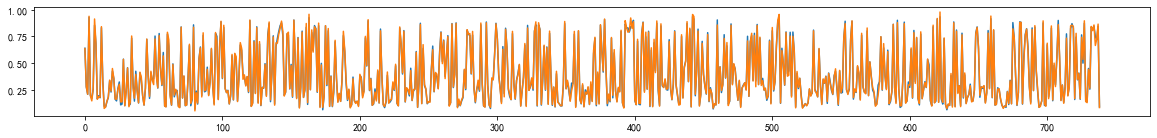

In [11]:
fig = plt.figure(figsize=(20, 2))
plt.plot(Y_predict_real)
plt.plot(Y_test_real)

In [12]:
def MAPE(true, pred):
    diff = np.abs(np.array(true) - np.array(pred))
    return np.mean(diff / true)
def RMSE(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

print(f"根均方误差(RMSE)：{RMSE(Y_predict_real, Y_test_real)}")
print(f"平均绝对百分比误差(MAPE)：{MAPE(Y_predict, Y_test)}")

根均方误差(RMSE)：0.016670321029365748
平均绝对百分比误差(MAPE)：0.04065882891353725
